# Python 2021-2

## Print

In [10]:
import sys
print(sys.version)

3.10.0 (tags/v3.10.0:b494f59, Oct  4 2021, 19:00:18) [MSC v.1929 64 bit (AMD64)]


## Tuplas

In [ ]:
#TUPLAS (valores inmutables, almacena cualquier valor)
t=(1,2,3,4)
print(t[0])
print(t[:])
print(t[0:3])


## Listas

In [ ]:
#LISTAS (valores mutables, almacena cualquier valor)
l=[1,2,3,4]
l.append(t)
print(l)
del l[4]
print(l)

## Sets

In [ ]:
#SETS (no permite valores duplicados, almacena cualquier valor, no permite acceso con los corchetes)
s={1,2.5,3,}
s.add(6)
print(s)

{1, 2.5, 3, 6}


## Bibliotecas

In [6]:
import math
import graphviz as gv
import numpy as np
import pandas as pd
import heapq as hq
import matplotlib.pyplot as plt

## Grafos

### Matriz de adyacencia

In [4]:
#matriz de adyacencia
def adjmShow(M, labels=None, directed=False, weighted=False, layout="neato"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.node_attr["style"] = "filled"
  g.node_attr["color"] = "orange"
  n = len(M)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  for u in range(n):
    for v in range(0 if directed else u, n):
      if weighted:
        if not np.isnan(M[u, v]):
          g.edge(str(u), str(v), f"{M[u, v]:.0f}")
      else:
        if M[u, v] == 1:
          g.edge(str(u), str(v))
  return g

### Lista de adyacencia

In [1]:
#lista de adyacencia
def adjlShow(L, labels=None, directed=False, weighted=False, layout="neato",path=[]):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.node_attr["style"] = "filled"
  g.node_attr["color"] = "orange"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  for v, u in enumerate(path):
    if u != None:
      if weighted:
        for vi, w in G[u]:
          if vi == v:
            break
        g.edge(str(u), str(v), str(w), dir="forward", penwidth="2", color="orange")
      else:
        g.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

### Lectura desde archivo

In [2]:
#lee lista de adyacencia desde archivo
def readAdjl(fn, haslabels=False, weighted=False, sep="|"):
  with open(fn) as f:
    labels = None
    if haslabels:
      labels = f.readline().strip().split()
    L = []
    for line in f:
      if weighted:
        L.append([tuple(map(int, p.split(sep))) for p in line.strip().split()])
        # line => "1|3 2|5 4|4" ==> [(1, 3), (2, 5), (4, 4)]
      else: 
        L.append(list(map(int, line.strip().split()))) # "1 3 5" => [1, 3, 5]
        # L.append([int(x) for x in line.strip().split()])
  return L, labels

### Ejemplos

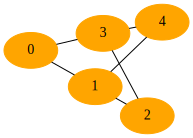

In [7]:
M1=[[0,1,0,1,0],[1,0,1,0,1],[0,1,0,1,0],[1,0,1,0,1],[0,1,0,1,0]]
adjmShow(np.array(M1))

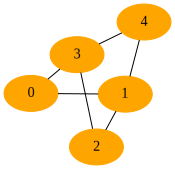

In [ ]:
M2=np.loadtxt("in.txt", dtype=np.int)
adjmShow(M2)

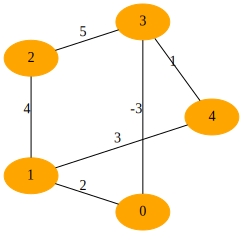

In [ ]:
df = pd.read_csv("in.txt", sep = " ", header = None).replace("x", np.nan) 
M3 = df.to_numpy().astype(np.float)
adjmShow(M3, weighted = True , layout ="circo")

In [ ]:
print(M3)

[[nan  2. nan -3. nan]
 [ 2. nan  4. nan  3.]
 [nan  4. nan  5. nan]
 [-3. nan  5. nan  1.]
 [nan  3. nan  1. nan]]


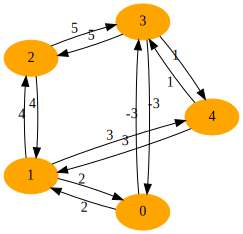

In [ ]:
adjmShow(M3, directed=True, weighted=True, layout="circo")

In [ ]:
n = len(M2)
print("Graph nodes:")
for u in range(n):
  print(f"Node {u}")

Graph nodes:
Node 0
Node 1
Node 2
Node 3
Node 4


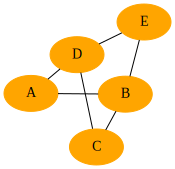

In [ ]:
L1 = [[1, 3],
      [0, 2, 4],
      [1, 3],
      [0, 2, 4],
      [1, 3]]
adjlShow(L1, labels=["A", "B", "C", "D", "E"])

[1, 3]
[0, 2, 4]
[1, 3]
[0, 2, 4]
[1, 3]


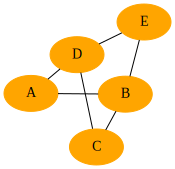

In [ ]:
L2, labels = readAdjl("2.adjl", haslabels=True)
for l in L2:
  print(l)
adjlShow(L2, labels=labels)


[(1, 2), (3, -3)]
[]
[(1, 4), (3, 5)]
[]
[(1, 3), (3, 1)]


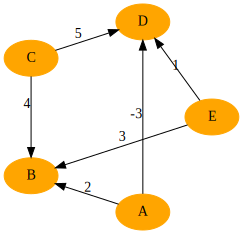

In [ ]:
L3, labels = readAdjl("3.adjl", haslabels=True, weighted=True)
for l in L3:
  print(l)
adjlShow(L3, labels=labels, directed=True, weighted=True, layout="circo")

In [ ]:
#Porcess Adjacency list
n = len(L2)
for u in range(n):
  print(f"Node {u}")

Node 0
Node 1
Node 2
Node 3
Node 4


In [ ]:

for u in range(n):
  for v in L2[u]:
    print(f"Edge from node {u} to node {v}")

Edge from node 0 to node 1
Edge from node 0 to node 3
Edge from node 1 to node 0
Edge from node 1 to node 2
Edge from node 1 to node 4
Edge from node 2 to node 1
Edge from node 2 to node 3
Edge from node 3 to node 0
Edge from node 3 to node 2
Edge from node 3 to node 4
Edge from node 4 to node 1
Edge from node 4 to node 3


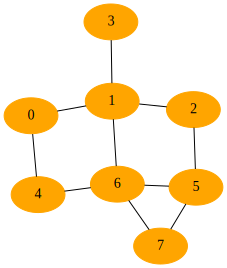

In [ ]:
G,_= readAdjl("ejercicio.adjl")
adjlShow(G)

In [ ]:
#for matrix
def isfull(G):
  n = len(G)
  for u in range(n):
    for v in range(n):
      if u != v and G[u, v] == 0:
        return False
  return True

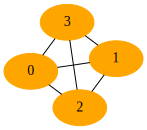

In [ ]:
G = np.loadtxt("full.adjm")
adjmShow(G)

### BFS

In [ ]:
def bfs(G, s):
  n = len(G)
  visited = [False]*n
  parent = [None]*n
  queue = [s]
  visited[s] = True

  while queue:
    u = queue.pop(0)
    for v in G[u]:
      if not visited[v]:
        visited[v] = True
        parent[v] = u
        queue.append(v)

  return parent

 0: [1, 2, 4, 7]
 1: [0, 5]
 2: [0, 12]
 3: [6, 10]
 4: [0]
 5: [1, 4, 6, 8]
 6: [3, 5, 9]
 7: [0, 8, 14]
 8: [5, 7]
 9: [6, 10, 12, 13]
10: [3, 9, 13, 17]
11: [12, 15]
12: [2, 9, 11, 15, 16]
13: [9, 10]
14: [7, 15]
15: [11, 12, 14, 16]
16: [12, 15, 17]
17: [10, 16]


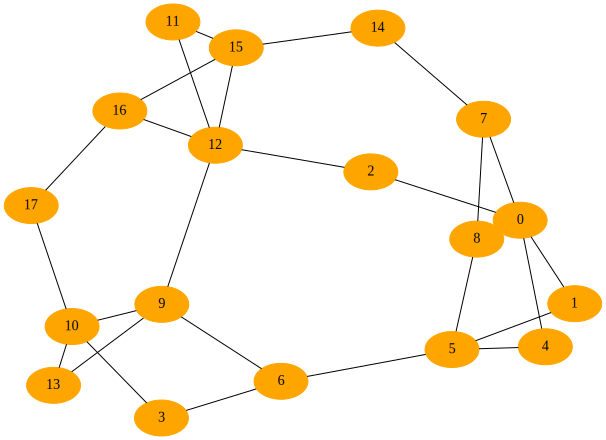

In [ ]:
Graph,_ = readAdjl("a.in")
for i, edges in enumerate(Graph):
  print(f"{i:2}: {edges}")
adjlShow(Graph, layout= "sfdp")

[1, 5, 12, 6, 5, 6, None, 8, 5, 6, 3, 12, 9, 9, 7, 12, 12, 10]


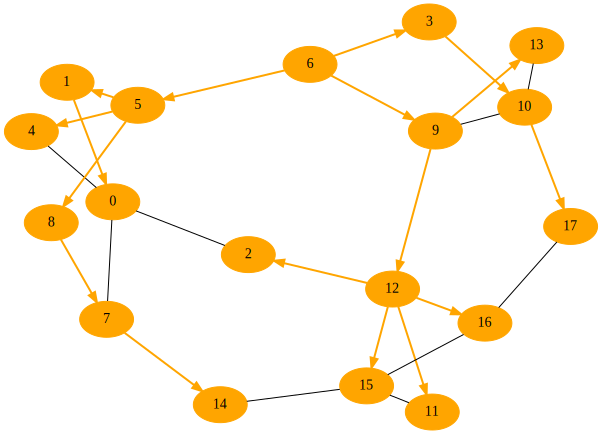

In [ ]:
path = bfs(Graph, 6)
print(path)
adjlShow(Graph, path=path, layout="sfdp")

### DFS

In [ ]:
def dfs(G, s):
  n = len(G)
  visited = [False]*n
  parent = [None]*n

  def _dfs(u):
    visited[u] = True
    for v in G[u]:
      if not visited[v]:
        parent[v] = u
        _dfs(v)

  _dfs(s)

  return parent

 0: [1, 2, 4, 7]
 1: [0, 5]
 2: [0, 12]
 3: [6, 10]
 4: [0]
 5: [1, 4, 6, 8]
 6: [3, 5, 9]
 7: [0, 8, 14]
 8: [5, 7]
 9: [6, 10, 12, 13]
10: [3, 9, 13, 17]
11: [12, 15]
12: [2, 9, 11, 15, 16]
13: [9, 10]
14: [7, 15]
15: [11, 12, 14, 16]
16: [12, 15, 17]
17: [10, 16]


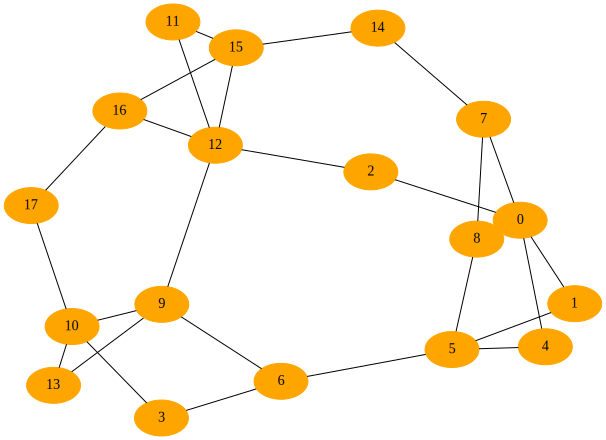

In [ ]:
Gdfs, _ = readAdjl("1.in")
for i, edges in enumerate(Gdfs):
  print(f"{i:2}: {edges}")
adjlShow(Gdfs, layout="sfdp")

[2, 0, 12, 6, 5, 1, None, 8, 5, 10, 3, 15, 9, 9, 7, 14, 15, 16]


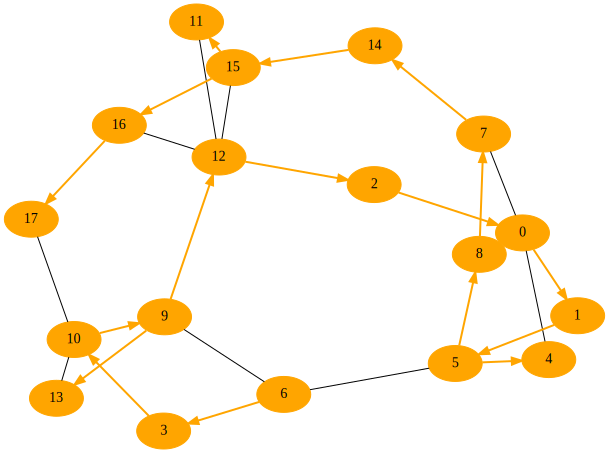

In [ ]:
path = dfs(Gdfs, 6)
print(path)
adjlShow(Gdfs, path=path, layout="sfdp")

#### DFS for Stack

In [ ]:
def dfs2(G, s):
  n = len(G)
  visited = [False]*n
  parent = [None]*n
  stack = [s]
  while stack:
    u = stack.pop()
    if not visited[u]:
      visited[u] = True
      for v in G[u]:
        if not visited[v]:
          parent[v] = u
          stack.append(v)

  return parent

[4, 0, 0, 10, 5, 8, None, 14, 7, 6, 13, 12, 2, 9, 15, 16, 17, 10]


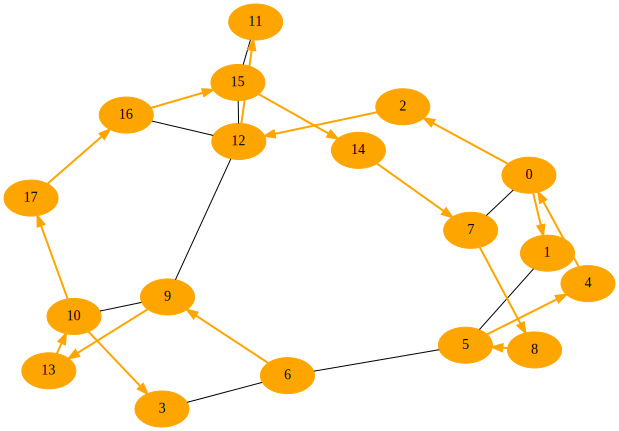

In [ ]:
path = dfs2(Gdfs, 6)
print(path)
adjlShow(Gdfs, path=path, layout="sfdp")

### Dijkstra

In [ ]:
def dijkstra(G, s):
  n = len(G)
  cost = [float('inf')]*n
  cost[s] = 0
  path = [-1]*n
  visited = [False]*n
  queue = [(0, s)]
  while queue:
    c, u = hq.heappop(queue)
    if visited[u]: continue
    visited[u] = True
    for v, w in G[u]:
      if not visited[v] and c + w < cost[v]:
        cost[v] = c + w
        path[v] = u
        hq.heappush(queue, (cost[v], v))
  return path, cost

 0: [(2, 4), (7, 8), (14, 3)]
 1: [(2, 7), (5, 7)]
 2: [(0, 4), (1, 7), (3, 5), (6, 1)]
 3: [(2, 5)]
 4: [(7, 7)]
 5: [(1, 7), (6, 1), (8, 5)]
 6: [(2, 1), (5, 1)]
 7: [(0, 8), (4, 7), (8, 8)]
 8: [(5, 5), (7, 8), (9, 8), (11, 9), (12, 6)]
 9: [(8, 8), (10, 8), (12, 9), (13, 7)]
10: [(9, 8), (13, 3)]
11: [(8, 9)]
12: [(8, 6), (9, 9), (13, 2), (15, 5)]
13: [(9, 7), (10, 13), (12, 2), (16, 9)]
14: [(0, 3), (15, 9)]
15: [(12, 5), (14, 9), (17, 7)]
16: [(13, 9), (17, 8)]
17: [(15, 7), (16, 8)]


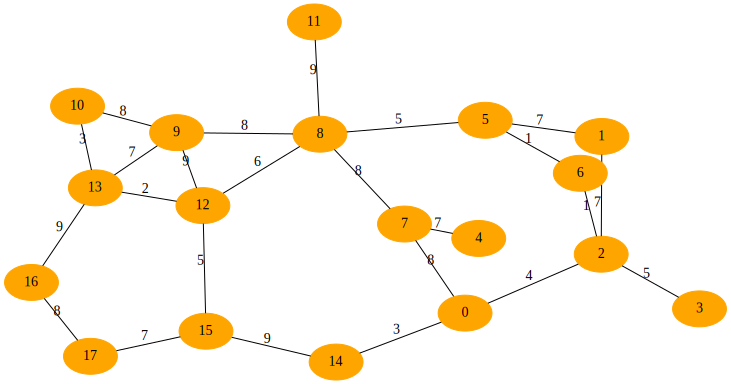

In [ ]:
Gdjks, _ = readAdjl("djs.in", weighted=True)
for i, edges in enumerate(Gdjks):
  print(f"{i:2}: {edges}")
adjlShow(Gdjks, weighted=True, layout="sfdp")

[2, 5, 6, 2, 7, 8, 5, 8, None, 8, 9, 8, 8, 12, 0, 12, 13, 15]


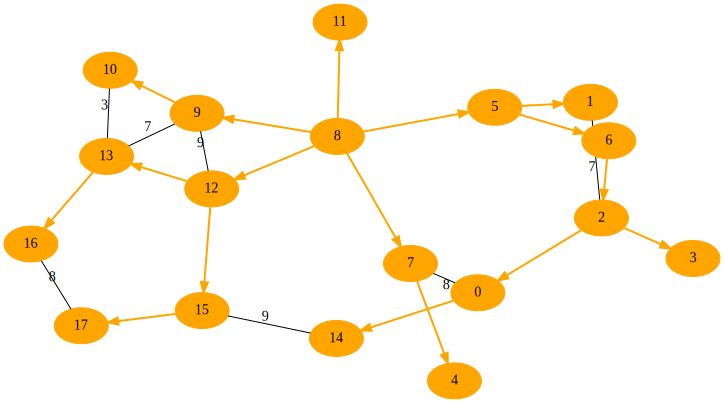

In [ ]:
path, cost = dijkstra(Gdjks, 8)
print(path)
adjlShow(Gdjks, weighted=True, path=path, layout="sfdp")

### Ordenamiento Topologico

In [ ]:
def topoSort(G):
  n = len(G)
  visited = [False]*n
  ts = []

  def dfs(u):
    if not visited[u]:
      visited[u] = True
      for v in G[u]:
        if not visited[v]:
          dfs(v)
      ts.append(u)

  for u in range(n):
    dfs(u)

  return ts

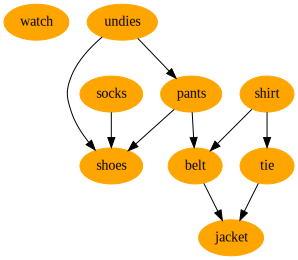

In [ ]:
Gts, labels = readAdjl("ts.in", haslabels=True)
adjlShow(Gts, labels=labels, directed=True, layout="dot")

In [ ]:
ts = topoSort(Gts)
print(list(reversed([labels[u] for u in ts])))

['socks', 'shirt', 'tie', 'undies', 'pants', 'shoes', 'belt', 'jacket', 'watch']


### Kosaraju

In [ ]:
def kosaraju(G):
  n = len(G)
  visited = [False]*n
  f = []

  # (1) producir grafo reverso
  Grev = reverse(G)

  # (2) producir orden de finalización con dfs sobre grafo reverso
  def dfs1(u):
    visited[u] = True
    for v in Grev[u]:
      if not visited[v]:
        dfs1(v)
    f.append(u)

  # (3) producir componentes
  def dfs2(u, cc):
    visited[u] = True
    for v in G[u]:
      if not visited[v]:
        dfs2(v, cc)
    cc.append(u)

  for u in range(n):
    if not visited[u]:
      dfs1(u)

  scc = []
  visited = [False]*n
  for u in reversed(f):
    if not visited[u]:
      cc = []
      dfs2(u, cc)
      scc.append(cc)

  return scc

In [ ]:
def reverse(G):
  n = len(G)
  Grev = [[] for _ in range(n)]
  for u in range(n):
    for v in G[u]:
      Grev[v].append(u)
  return Grev

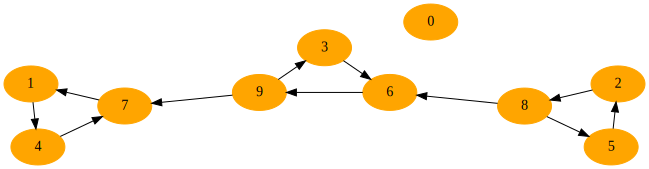

In [ ]:
Gkj, _ = readAdjl('kj.in')
adjlShow(Gkj, directed=True, layout="sfdp")

In [ ]:
kosaraju(Gkj)

[[7, 4, 1], [6, 3, 9], [2, 5, 8], [0]]

### Conjuntos Disconjuntos

In [ ]:
class DisjointSet:
    def __init__(self, n):
        self.s = [-1]*n

    def find(self, a):
        if self.s[a] < 0:
            return a
        parent = self.find(self.s[a])
        self.s[a] = parent
        return parent

    def sameset(self, a, b):
        return self.find(a) == self.find(b)

    def union(self, a, b):
        if self.sameset(a, b):
            return
        a = self.find(a)
        b = self.find(b)
        if -self.s[a] > -self.s[b]:
            self.s[a] += self.s[b]
            self.s[b] = a
        else:
            self.s[b] += self.s[a]
            self.s[a] = b

### Arboles de Distribucion Minima (MST)

In [ ]:
def readforTree(fn, haslabels=False, weighted=False, sep="|"):
  with open(fn) as f:
    labels = None
    if haslabels:
      labels = f.readline().strip().split()
    L = []
    for line in f:
      if weighted:
        L.append([tuple(map(int, p.split(sep))) for p in line.strip().split()])
        # line => "1|3 2|5 4|4" ==> [(1, 3), (2, 5), (4, 4)]
      else: 
        L.append(list(map(int, line.strip().split()))) # "1 3 5" => [1, 3, 5]
        # L.append([int(x) for x in line.strip().split()])
  return L, labels

def shorforTree(L, labels=None, directed=False, weighted=False, path=[],
             layout="sfdp"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.edge_attr["color"] = "gray"
  g.node_attr["color"] = "orangered"
  g.node_attr["width"] = "0.1"
  g.node_attr["height"] = "0.1"
  g.node_attr["fontsize"] = "8"
  g.node_attr["fontcolor"] = "mediumslateblue"
  g.node_attr["fontname"] = "monospace"
  g.edge_attr["fontsize"] = "8"
  g.edge_attr["fontname"] = "monospace"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  for v, u in enumerate(path):
    if u != None:
      if weighted:
        for vi, w in G[u]:
          if vi == v:
            break
        g.edge(str(u), str(v), str(w), dir="forward", penwidth="2", color="orange")
      else:
        g.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

### Algoritmos Prim

In [ ]:
def prim(G):
  n = len(G)
  visited = [False]*n
  path = [-1]*n
  cost = [math.inf]*n
  q = [(0, 0)]
  while q:
    _, u = hq.heappop(q)
    if not visited[u]:
      visited[u] = True
      for v, w in G[u]:
        if not visited[v] and w < cost[v]:
          cost[v] = w
          path[v] = u
          hq.heappush(q, (w, v))

  return path, cost

### Floyd Warshall

In [5]:
def floydWarshall(G):
  n = len(G)
  cost = [[float('inf')]*n for _ in range(n)]
  path = [[-1]*n for _ in range(n)]
  for u in range(n):
    cost[u][u] = 0
    for v, w in G[u]:
      cost[u][v] = w
      path[u][v] = u
  # relax
  for k in range(n):
    for i in range(n):
      if i == k: continue
      for j in range(n):
        if j == k or j == i: continue
        f = cost[i][k] + cost[k][j]
        if f < cost[i][j]:
          cost[i][j] = f
          path[i][j] = path[k][j]
  return path, cost

### Bellman Ford

In [ ]:
def bellmanFord(G, s):
    n = len(G)
    # initialize
    cost = [float('inf')]*n
    cost[s] = 0
    path = [-1]*n
    # relax
    for _ in range(n-1):
        for u in range(n):
            for v, w in G[u]:
                if cost[u] + w < cost[v]:
                    cost[v] = cost[u] + w
                    path[v] = u
    # check negative cycle
    for u in range(n):
        for v, w in G[u]:
            if cost[u] + w < cost[v]:
                return None, None
    return path, cost

### Johnson

In [ ]:
def johnson(G):
  n = len(G)
  G.append([(n-1, 0)])
  _, g = bellmanFord(G, n)
  if not g: return None
  Gprime = [[] for _ in range(n)]
  for u in range(n):
    for v, w in G[u]:
      Gprime[u].append((v, w + g[u] - g[v])) # :O
  path = []
  for u in range(n):
    p, _ = dijkstra(Gprime, u)
    path.append(p)
  G.pop()
  return path